10000 10000
Input dataset; [[  1 100]
 [  1  99]
 [  1  98]
 ...
 [100   3]
 [100   2]
 [100   1]]
Outputs;  [100  99  98 ... 300 200 100]
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 2)                 0         
_________________________________________________________________
dense_151 (Dense)            (None, 64)                192       
_________________________________________________________________
dense_152 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_153 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_154 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_155 (Dense)            (None, 1)        

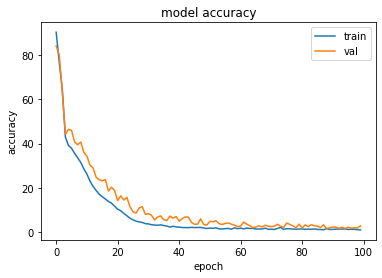

In [37]:
# https://authors.library.caltech.edu/29665/1/SIUieeetit93.pdf

# z = x * y
# z = x^2 - y^2

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense, Dropout
from keras.models import Sequential
from matplotlib import pyplot as plt

X = list(range(1,101, 1))
Y = list(range(100,0,-1))


# X = list(range(1,101, 2))
# Y = list(range(100,0,-2))


trainingInput = np.array([ [x,y] for x in X for y in Y])
trainingOutput = np.array([ x*y for x in X for y in Y])

print(len(trainingInput),len(trainingOutput))

print("Input dataset;", trainingInput)
print("Outputs; ", trainingOutput)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),

    keras.layers.Dense(1)
])


opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='mape')

print(model.summary())
history = model.fit(trainingInput, trainingOutput, batch_size=100, validation_split=0.1, epochs=100, verbose=1, shuffle=True)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [38]:
a = np.array([[10, 2], [3.5,4], [21, 0.5], [1.5, 48.6], [25, 25], [-10, 10], [-5, 5]])
np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})
print(model.predict(a))


[[19.428]
 [14.6952]
 [13.4027]
 [72.6755]
 [621.641]
 [-29.3745]
 [-8.78301]]


[[0 4.60517]
 [0 4.59512]
 [0 4.58497]
 ...
 [4.60517 1.09861]
 [4.60517 0.693147]
 [4.60517 0]]
[4.60517 4.59512 4.58497 ... 5.70378 5.29832 4.60517]
Epoch 1/10
180/180 [==============================] - 1s 3ms/step - loss: 0.0066 - val_loss: 2.5283e-05
Epoch 2/10
180/180 [==============================] - 0s 2ms/step - loss: 5.1847e-06 - val_loss: 2.0721e-07
Epoch 3/10
180/180 [==============================] - 0s 2ms/step - loss: 4.7467e-08 - val_loss: 5.2184e-10
Epoch 4/10
180/180 [==============================] - 0s 2ms/step - loss: 2.9814e-10 - val_loss: 3.0877e-13
Epoch 5/10
180/180 [==============================] - 0s 2ms/step - loss: 2.2176e-10 - val_loss: 3.2992e-13
Epoch 6/10
180/180 [==============================] - 0s 2ms/step - loss: 2.1956e-10 - val_loss: 5.5093e-13
Epoch 7/10
180/180 [==============================] - 0s 2ms/step - loss: 2.1855e-10 - val_loss: 1.8144e-13
Epoch 8/10
180/180 [==============================] - 0s 2ms/step - loss: 2.1630e-10 - val_loss: 

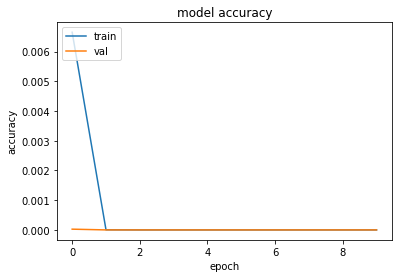

In [107]:
# Log version

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from keras import Input, Model
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
import math

X = list(range(1,101,1))
Y = list(range(100,0,-1))
trainingInput = np.array([ [math.log(x),math.log(y)] for x in X for y in Y])
trainingOutput = np.array([ math.log(x) + math.log(y)  for x in X for y in Y])

print(trainingInput)
print(trainingOutput)

log_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(2,)),
    keras.layers.Dense(1, activation="relu"),
	#keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(1)
])

opt = keras.optimizers.Adam(learning_rate=0.01)
log_model.compile(optimizer=opt, loss="mse")

history = log_model.fit(trainingInput, trainingOutput, batch_size=50, validation_split=0.1, epochs=10, verbose=1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [111]:
a = np.array([[math.log(100), math.log(23.74)]])
np.set_printoptions(formatter={"float_kind": lambda x: "%g" % x})
print(math.exp(log_model.predict(a)))

2374.000331079282
